# Exploration Of Prosper Loan
## by (Nasser Al-Nasser)

## Preliminary Wrangling

> The data is for a loan and I will do some cleaning to answer my question and my question is insights about the satisfaction and customers journey.



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
Loan = pd.read_csv('prosperLoanData.csv')

In [3]:
Loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [4]:
base_color = sb.color_palette()[0]

''

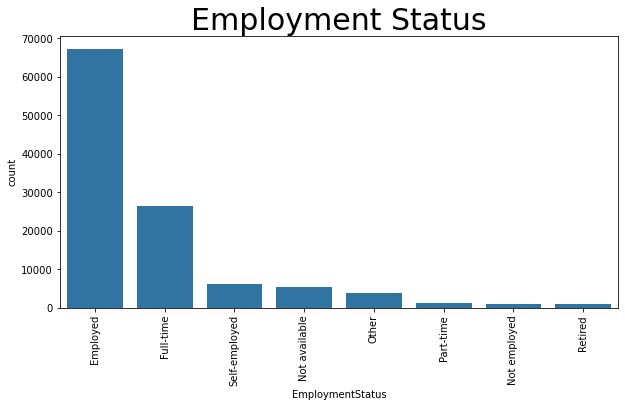

In [5]:
plt.figure(figsize = [10, 5])
plt.title("Employment Status", size=30)
sb.countplot(data = Loan, x = 'EmploymentStatus',color=base_color, order=Loan['EmploymentStatus'].value_counts().index)
plt.xticks(rotation=90)
;

#### Insight
> The not available data her will keep it since it is stated that it is not a blank.

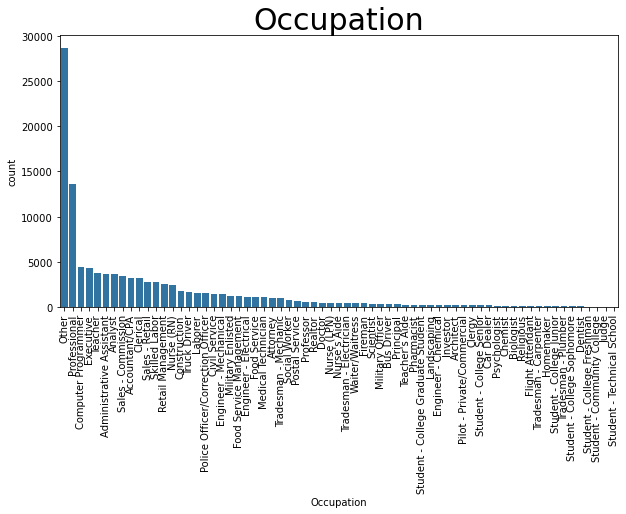

In [6]:
plt.figure(figsize = [10, 5])
plt.title("Occupation", size=30)
sb.countplot(data = Loan, x = 'Occupation',color=base_color, order=Loan['Occupation'].value_counts().index)
plt.xticks(rotation=90);

#### Insight

> Here I will keep every thing as it is but will remove the nulls from the other columns, even with most of the occupations aren't stated, it is still important for the general data.

> It has 113937 Rows and 81 coloumns, and the data types are arranged as: 
- bool(3)
- float64(50)
- int64(11)
- object(17)


In [7]:
Loan.shape

(113937, 81)

In [8]:
Loan.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


### What is the structure of your dataset?

> It has 113937 Rows and 81 coloumns, and the data types are arranged as: 
- bool(3)
- float64(50)
- int64(11)
- object(17)


### What is/are the main feature(s) of interest in your dataset?

> It has many qualitative data, wich I will use in analysing the satisfaction of the customers, also is easy to clean and can have different uses to many departments in the company especially marketing.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> The qualitative data also the categorical data specifically will help me to know more about the customer not only the transactions he did.

# Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

In [9]:
Loan_clean = Loan
Loan_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

> It has many qualitative data, wich I will use in analysing the satisfaction of the customers, also is easy to clean and can have different uses to many departments in the company especially marketing.

In [10]:
Unneeded_cols = ['LoanFirstDefaultedCycleNumber', 'CreditGrade', 'GroupKey', 'ScorexChangeAtTimeOfListing']

Loan_clean.drop(Unneeded_cols, inplace=True, axis=1)

In [11]:
Loan_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 77 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   Term                                 113937 non-null  int64  
 4   LoanStatus                           113937 non-null  object 
 5   ClosedDate                           55089 non-null   object 
 6   BorrowerAPR                          113912 non-null  float64
 7   BorrowerRate                         113937 non-null  float64
 8   LenderYield                          113937 non-null  float64
 9   EstimatedEffectiveYield              84853 non-null   float64
 10  EstimatedLoss                        84853 non-null   float64
 11  EstimatedRetu

In [12]:
# I will replace the none values in the 'ClosedDate'with 'Un closed' because they are still current customers in the 'LoanStatus'.

Loan_clean["ClosedDate"] = Loan_clean["ClosedDate"].fillna('Un Closed')


In [13]:
Loan_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 77 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   Term                                 113937 non-null  int64  
 4   LoanStatus                           113937 non-null  object 
 5   ClosedDate                           113937 non-null  object 
 6   BorrowerAPR                          113912 non-null  float64
 7   BorrowerRate                         113937 non-null  float64
 8   LenderYield                          113937 non-null  float64
 9   EstimatedEffectiveYield              84853 non-null   float64
 10  EstimatedLoss                        84853 non-null   float64
 11  EstimatedRetu

In [14]:
Loan_clean.head()

,ListingKey,ListingNumber,ListingCreationDate,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,NaN,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,36,Current,Un Closed,0.12016,0.0920,0.0820,0.07960,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,NaN,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,36,Current,Un Closed,0.12528,0.0974,0.0874,0.08490,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,36,Current,Un Closed,0.24614,0.2085,0.1985,0.18316,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [15]:
# I will remove all the data that are based on income and loss, because it ha alot of missed data cells and don't help me in my analysis.
Unneeded_cols2 = ['BorrowerAPR', 'BorrowerRate', 'LenderYield', 'EstimatedEffectiveYield','LP_CollectionFees', 'LP_GrossPrincipalLoss','LP_NetPrincipalLoss','LP_NonPrincipalRecoverypayments','PercentFunded','InvestmentFromFriendsCount','InvestmentFromFriendsAmount','Investors']

Loan_clean.drop(Unneeded_cols2, inplace=True, axis=1) 

In [16]:
Loan_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 65 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   Term                                 113937 non-null  int64  
 4   LoanStatus                           113937 non-null  object 
 5   ClosedDate                           113937 non-null  object 
 6   EstimatedLoss                        84853 non-null   float64
 7   EstimatedReturn                      84853 non-null   float64
 8   ProsperRating (numeric)              84853 non-null   float64
 9   ProsperRating (Alpha)                84853 non-null   object 
 10  ProsperScore                         84853 non-null   float64
 11  ListingCatego

In [17]:
Loan_clean.head()

,ListingKey,ListingNumber,ListingCreationDate,Term,LoanStatus,ClosedDate,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),...,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,Recommendations
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,36,Completed,2009-08-14 00:00:00,NaN,NaN,NaN,NaN,...,9425,2007-09-12 00:00:00,Q3 2007,1F3E3376408759268057EDA,330.43,11396.14,9425.00,1971.14,-133.18,0
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,36,Current,Un Closed,0.0249,0.05470,6.0,A,...,10000,2014-03-03 00:00:00,Q1 2014,1D13370546739025387B2F4,318.93,0.00,0.00,0.00,0.00,0
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,36,Completed,2009-12-17 00:00:00,NaN,NaN,NaN,NaN,...,3001,2007-01-17 00:00:00,Q1 2007,5F7033715035555618FA612,123.32,4186.63,3001.00,1185.63,-24.20,0
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,36,Current,Un Closed,0.0249,0.06000,6.0,A,...,10000,2012-11-01 00:00:00,Q4 2012,9ADE356069835475068C6D2,321.45,5143.20,4091.09,1052.11,-108.01,0
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,36,Current,Un Closed,0.0925,0.09066,3.0,D,...,15000,2013-09-20 00:00:00,Q3 2013,36CE356043264555721F06C,563.97,2819.85,1563.22,1256.63,-60.27,0


In [18]:
df = Loan_clean

In [19]:
# I will comlete in the process to remove all the data that are based on income and loss, because it ha alot of missed data cells and don't help me in my analysis.
# will also remove the 'ListingKey' it is additional info for my analysis, also the 'Term' will be removed 
# I will remove the 'LoanStatus' also because the 'ClosedDate' also provide the same info with additional info of the closed date
Unneeded_cols3 = ['ListingKey', 'Term', 'LoanStatus', 'EstimatedLoss','EstimatedReturn', 'LP_CustomerPayments','LP_InterestandFees','ProsperPaymentsLessThanOneMonthLate','TotalProsperPaymentsBilled','LoanKey','TotalProsperLoans','TradesNeverDelinquent (percentage)', 'TotalCreditLinespast7years', 'AmountDelinquent', 'CurrentDelinquencies', 'TotalInquiries', 'TotalCreditLinespast7years', 'OpenCreditLines', 'CurrentCreditLines', 'FirstRecordedCreditLine', 'EmploymentStatusDuration']

Loan_clean.drop(Unneeded_cols3, inplace=True, axis=1);

In [20]:
# Testing 
Loan_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 45 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   ListingNumber                    113937 non-null  int64  
 1   ListingCreationDate              113937 non-null  object 
 2   ClosedDate                       113937 non-null  object 
 3   ProsperRating (numeric)          84853 non-null   float64
 4   ProsperRating (Alpha)            84853 non-null   object 
 5   ProsperScore                     84853 non-null   float64
 6   ListingCategory (numeric)        113937 non-null  int64  
 7   BorrowerState                    108422 non-null  object 
 8   Occupation                       110349 non-null  object 
 9   EmploymentStatus                 111682 non-null  object 
 10  IsBorrowerHomeowner              113937 non-null  bool   
 11  CurrentlyInGroup                 113937 non-null  bool   
 12  Da

In [21]:
# Testing 
Loan_clean.head()

,ListingNumber,ListingCreationDate,ClosedDate,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,...,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPrincipalPayments,LP_ServiceFees,Recommendations
0,193129,2007-08-26 19:09:29.263000000,2009-08-14 00:00:00,NaN,NaN,NaN,0,CO,Other,Self-employed,...,78,19141,9425,2007-09-12 00:00:00,Q3 2007,1F3E3376408759268057EDA,330.43,9425.00,-133.18,0
1,1209647,2014-02-27 08:28:07.900000000,Un Closed,6.0,A,7.0,2,CO,Professional,Employed,...,0,134815,10000,2014-03-03 00:00:00,Q1 2014,1D13370546739025387B2F4,318.93,0.00,0.00,0
2,81716,2007-01-05 15:00:47.090000000,2009-12-17 00:00:00,NaN,NaN,NaN,0,GA,Other,Not available,...,86,6466,3001,2007-01-17 00:00:00,Q1 2007,5F7033715035555618FA612,123.32,3001.00,-24.20,0
3,658116,2012-10-22 11:02:35.010000000,Un Closed,6.0,A,9.0,16,GA,Skilled Labor,Employed,...,16,77296,10000,2012-11-01 00:00:00,Q4 2012,9ADE356069835475068C6D2,321.45,4091.09,-108.01,0
4,909464,2013-09-14 18:38:39.097000000,Un Closed,3.0,D,4.0,2,MN,Executive,Employed,...,6,102670,15000,2013-09-20 00:00:00,Q3 2013,36CE356043264555721F06C,563.97,1563.22,-60.27,0


In [22]:
# I will Change the None Rows in Ratings to closed.

Loan_clean["ProsperRating (numeric)"] = Loan_clean["ProsperRating (numeric)"].fillna('Closed')
Loan_clean["ProsperRating (Alpha)"] = Loan_clean["ProsperRating (Alpha)"].fillna('Closed')
Loan_clean["ProsperScore"] = Loan_clean["ProsperScore"].fillna('Closed')


In [23]:
Loan_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 45 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   ListingNumber                    113937 non-null  int64  
 1   ListingCreationDate              113937 non-null  object 
 2   ClosedDate                       113937 non-null  object 
 3   ProsperRating (numeric)          113937 non-null  object 
 4   ProsperRating (Alpha)            113937 non-null  object 
 5   ProsperScore                     113937 non-null  object 
 6   ListingCategory (numeric)        113937 non-null  int64  
 7   BorrowerState                    108422 non-null  object 
 8   Occupation                       110349 non-null  object 
 9   EmploymentStatus                 111682 non-null  object 
 10  IsBorrowerHomeowner              113937 non-null  bool   
 11  CurrentlyInGroup                 113937 non-null  bool   
 12  Da

In [24]:
Loan_clean.head()

,ListingNumber,ListingCreationDate,ClosedDate,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,...,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPrincipalPayments,LP_ServiceFees,Recommendations
0,193129,2007-08-26 19:09:29.263000000,2009-08-14 00:00:00,Closed,Closed,Closed,0,CO,Other,Self-employed,...,78,19141,9425,2007-09-12 00:00:00,Q3 2007,1F3E3376408759268057EDA,330.43,9425.00,-133.18,0
1,1209647,2014-02-27 08:28:07.900000000,Un Closed,6,A,7,2,CO,Professional,Employed,...,0,134815,10000,2014-03-03 00:00:00,Q1 2014,1D13370546739025387B2F4,318.93,0.00,0.00,0
2,81716,2007-01-05 15:00:47.090000000,2009-12-17 00:00:00,Closed,Closed,Closed,0,GA,Other,Not available,...,86,6466,3001,2007-01-17 00:00:00,Q1 2007,5F7033715035555618FA612,123.32,3001.00,-24.20,0
3,658116,2012-10-22 11:02:35.010000000,Un Closed,6,A,9,16,GA,Skilled Labor,Employed,...,16,77296,10000,2012-11-01 00:00:00,Q4 2012,9ADE356069835475068C6D2,321.45,4091.09,-108.01,0
4,909464,2013-09-14 18:38:39.097000000,Un Closed,3,D,4,2,MN,Executive,Employed,...,6,102670,15000,2013-09-20 00:00:00,Q3 2013,36CE356043264555721F06C,563.97,1563.22,-60.27,0


In [25]:
Loan_clean.BorrowerState.value_counts()

CA    14717
TX     6842
NY     6729
FL     6720
IL     5921
GA     5008
OH     4197
MI     3593
VA     3278
NJ     3097
NC     3084
WA     3048
PA     2972
MD     2821
MO     2615
MN     2318
MA     2242
CO     2210
IN     2078
AZ     1901
WI     1842
OR     1817
TN     1737
AL     1679
CT     1627
SC     1122
NV     1090
KS     1062
KY      983
OK      971
LA      954
UT      877
AR      855
MS      787
NE      674
ID      599
NH      551
NM      472
RI      435
HI      409
WV      391
DC      382
MT      330
DE      300
VT      207
AK      200
SD      189
IA      186
WY      150
ME      101
ND       52
Name: BorrowerState, dtype: int64

In [26]:
Loan_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 45 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   ListingNumber                    113937 non-null  int64  
 1   ListingCreationDate              113937 non-null  object 
 2   ClosedDate                       113937 non-null  object 
 3   ProsperRating (numeric)          113937 non-null  object 
 4   ProsperRating (Alpha)            113937 non-null  object 
 5   ProsperScore                     113937 non-null  object 
 6   ListingCategory (numeric)        113937 non-null  int64  
 7   BorrowerState                    108422 non-null  object 
 8   Occupation                       110349 non-null  object 
 9   EmploymentStatus                 111682 non-null  object 
 10  IsBorrowerHomeowner              113937 non-null  bool   
 11  CurrentlyInGroup                 113937 non-null  bool   
 12  Da

In [27]:
Loan_clean.dropna(subset = ['BorrowerState'])

,ListingNumber,ListingCreationDate,ClosedDate,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,...,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPrincipalPayments,LP_ServiceFees,Recommendations
0,193129,2007-08-26 19:09:29.263000000,2009-08-14 00:00:00,Closed,Closed,Closed,0,CO,Other,Self-employed,...,78,19141,9425,2007-09-12 00:00:00,Q3 2007,1F3E3376408759268057EDA,330.43,9425.00,-133.18,0
1,1209647,2014-02-27 08:28:07.900000000,Un Closed,6,A,7,2,CO,Professional,Employed,...,0,134815,10000,2014-03-03 00:00:00,Q1 2014,1D13370546739025387B2F4,318.93,0.00,0.00,0
2,81716,2007-01-05 15:00:47.090000000,2009-12-17 00:00:00,Closed,Closed,Closed,0,GA,Other,Not available,...,86,6466,3001,2007-01-17 00:00:00,Q1 2007,5F7033715035555618FA612,123.32,3001.00,-24.20,0
3,658116,2012-10-22 11:02:35.010000000,Un Closed,6,A,9,16,GA,Skilled Labor,Employed,...,16,77296,10000,2012-11-01 00:00:00,Q4 2012,9ADE356069835475068C6D2,321.45,4091.09,-108.01,0
4,909464,2013-09-14 18:38:39.097000000,Un Closed,3,D,4,2,MN,Executive,Employed,...,6,102670,15000,2013-09-20 00:00:00,Q3 2013,36CE356043264555721F06C,563.97,1563.22,-60.27,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113932,753087,2013-04-14 05:55:02.663000000,Un Closed,4,C,5,1,IL,Food Service Management,Employed,...,11,88485,10000,2013-04-22 00:00:00,Q2 2013,2EC435768441332602FDC15,364.74,2238.38,-75.58,0
113933,537216,2011-11-03 20:42:55.333000000,Un Closed,6,A,8,7,PA,Professional,Employed,...,28,55801,2000,2011-11-07 00:00:00,Q4 2011,55C4336679182766893E4FC,65.57,1997.16,-30.05,0
113934,1069178,2013-12-13 05:49:12.703000000,Un Closed,3,D,3,1,TX,Other,Employed,...,3,123122,10000,2013-12-23 00:00:00,Q4 2013,0FE0370029359765342FDB5,273.35,183.15,-16.91,0
113935,539056,2011-11-14 13:18:26.597000000,2013-08-13 00:00:00,4,C,5,2,GA,Food Service,Full-time,...,28,56401,15000,2011-11-21 00:00:00,Q4 2011,A33834861822272782621C8,449.55,15000.00,-235.05,0


In [28]:
Loan_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 45 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   ListingNumber                    113937 non-null  int64  
 1   ListingCreationDate              113937 non-null  object 
 2   ClosedDate                       113937 non-null  object 
 3   ProsperRating (numeric)          113937 non-null  object 
 4   ProsperRating (Alpha)            113937 non-null  object 
 5   ProsperScore                     113937 non-null  object 
 6   ListingCategory (numeric)        113937 non-null  int64  
 7   BorrowerState                    108422 non-null  object 
 8   Occupation                       110349 non-null  object 
 9   EmploymentStatus                 111682 non-null  object 
 10  IsBorrowerHomeowner              113937 non-null  bool   
 11  CurrentlyInGroup                 113937 non-null  bool   
 12  Da

In [29]:
# I will remove 'OnTimeProsperPayments', 'ProsperPrincipalBorrowed','ProsperPaymentsOneMonthPlusLate', and 'ProsperPrincipalOutstanding', since they have alot of missing data and they are not making any problems through my analysis.
# Also will remove 'Recommendations' since it has no need

Unneeded_cols4 = ['TradesOpenedLast6Months','TotalTrades','AvailableBankcardCredit','BankcardUtilization','RevolvingCreditBalance','PublicRecordsLast12Months','PublicRecordsLast10Years','DelinquenciesLast7Years','InquiriesLast6Months','OpenRevolvingMonthlyPayment','OpenRevolvingAccounts','CreditScoreRangeUpper','CreditScoreRangeLower','DateCreditPulled','OnTimeProsperPayments', 'ProsperPrincipalBorrowed', 'ProsperPrincipalOutstanding', 'ProsperPaymentsOneMonthPlusLate', 'Recommendations']

Loan_clean.drop(Unneeded_cols4, inplace=True, axis=1);

In [30]:
Loan_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 26 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   ListingNumber                 113937 non-null  int64  
 1   ListingCreationDate           113937 non-null  object 
 2   ClosedDate                    113937 non-null  object 
 3   ProsperRating (numeric)       113937 non-null  object 
 4   ProsperRating (Alpha)         113937 non-null  object 
 5   ProsperScore                  113937 non-null  object 
 6   ListingCategory (numeric)     113937 non-null  int64  
 7   BorrowerState                 108422 non-null  object 
 8   Occupation                    110349 non-null  object 
 9   EmploymentStatus              111682 non-null  object 
 10  IsBorrowerHomeowner           113937 non-null  bool   
 11  CurrentlyInGroup              113937 non-null  bool   
 12  DebtToIncomeRatio             105383 non-nul

In [31]:
# Dropping the nule values
Loan_clean.dropna(inplace=True)
Loan_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97752 entries, 0 to 113936
Data columns (total 26 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ListingNumber                 97752 non-null  int64  
 1   ListingCreationDate           97752 non-null  object 
 2   ClosedDate                    97752 non-null  object 
 3   ProsperRating (numeric)       97752 non-null  object 
 4   ProsperRating (Alpha)         97752 non-null  object 
 5   ProsperScore                  97752 non-null  object 
 6   ListingCategory (numeric)     97752 non-null  int64  
 7   BorrowerState                 97752 non-null  object 
 8   Occupation                    97752 non-null  object 
 9   EmploymentStatus              97752 non-null  object 
 10  IsBorrowerHomeowner           97752 non-null  bool   
 11  CurrentlyInGroup              97752 non-null  bool   
 12  DebtToIncomeRatio             97752 non-null  float64
 13  

In [32]:
Loan_clean.EmploymentStatus.value_counts()

Employed         65896
Full-time        24118
Not available     2897
Other             2194
Self-employed      993
Part-time          884
Retired            702
Not employed        68
Name: EmploymentStatus, dtype: int64

In [33]:
base_color = sb.color_palette()[0]


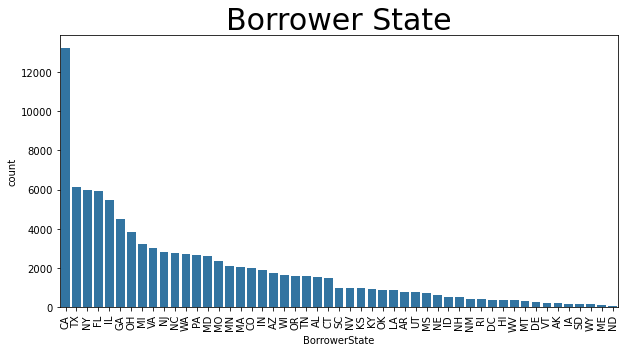

In [34]:
plt.figure(figsize = [10, 5])
plt.title("Borrower State", size=30)
sb.countplot(data = Loan, x = 'BorrowerState',color=base_color, order=Loan['BorrowerState'].value_counts().index)
plt.xticks(rotation=90);

#### Insight
>A big insight we can see her through CA state, that needs to have an analysis about.

In [35]:
# I want to slice the data types
Loan_clean.dtypes

ListingNumber                     int64
ListingCreationDate              object
ClosedDate                       object
ProsperRating (numeric)          object
ProsperRating (Alpha)            object
ProsperScore                     object
ListingCategory (numeric)         int64
BorrowerState                    object
Occupation                       object
EmploymentStatus                 object
IsBorrowerHomeowner                bool
CurrentlyInGroup                   bool
DebtToIncomeRatio               float64
IncomeRange                      object
IncomeVerifiable                   bool
StatedMonthlyIncome             float64
LoanCurrentDaysDelinquent         int64
LoanMonthsSinceOrigination        int64
LoanNumber                        int64
LoanOriginalAmount                int64
LoanOriginationDate              object
LoanOriginationQuarter           object
MemberKey                        object
MonthlyLoanPayment              float64
LP_CustomerPrincipalPayments    float64


In [36]:
# the process of data types slicing 
msk = Loan_clean.dtypes == np.float64

In [37]:
# the process of data types slicing cont.
msk.head()

ListingNumber              False
ListingCreationDate        False
ClosedDate                 False
ProsperRating (numeric)    False
ProsperRating (Alpha)      False
dtype: bool

In [38]:
# the process of data types slicing cont.
np.round(df.loc[:, msk], 2)

,DebtToIncomeRatio,StatedMonthlyIncome,MonthlyLoanPayment,LP_CustomerPrincipalPayments,LP_ServiceFees
0,0.17,3083.33,330.43,9425.00,-133.18
1,0.18,6125.00,318.93,0.00,0.00
2,0.06,2083.33,123.32,3001.00,-24.20
3,0.15,2875.00,321.45,4091.09,-108.01
4,0.26,9583.33,563.97,1563.22,-60.27
...,...,...,...,...,...
113932,0.13,4333.33,364.74,2238.38,-75.58
113933,0.11,8041.67,65.57,1997.16,-30.05
113934,0.51,2875.00,273.35,183.15,-16.91
113935,0.48,3875.00,449.55,15000.00,-235.05


In [39]:
# the process of data types slicing cont.
df.loc[:, msk] = np.round(df.loc[:, msk], 2)

In [40]:
# Test for Floats 
list(Loan_clean.select_dtypes(['float64']).columns)


['DebtToIncomeRatio',
 'StatedMonthlyIncome',
 'MonthlyLoanPayment',
 'LP_CustomerPrincipalPayments',
 'LP_ServiceFees']

In [41]:
# Merging 
df = ['DebtToIncomeRatio',
 'StatedMonthlyIncome',
 'MonthlyLoanPayment',
 'LP_CustomerPrincipalPayments',
 'LP_ServiceFees']

In [42]:
# Listing objects 
list(Loan_clean.select_dtypes(['object']).columns)

['ListingCreationDate',
 'ClosedDate',
 'ProsperRating (numeric)',
 'ProsperRating (Alpha)',
 'ProsperScore',
 'BorrowerState',
 'Occupation',
 'EmploymentStatus',
 'IncomeRange',
 'LoanOriginationDate',
 'LoanOriginationQuarter',
 'MemberKey']

In [43]:
# Merging objects to make it easy to find when visualizing 
object = ['ListingCreationDate',
 'ClosedDate',
 'ProsperRating (numeric)',
 'ProsperRating (Alpha)',
 'ProsperScore',
 'BorrowerState',
 'Occupation',
 'EmploymentStatus',
 'IncomeRange',
 'LoanOriginationDate',
 'LoanOriginationQuarter',
 'MemberKey']

## Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> I didn't realy transform any of the formats, since I will use mostly qualitative data, I removed some of the data that I thought it has a meaningful data, so I droped them like Recomendations.
 

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> I replaced the none values in the 'ClosedDate'with 'Un closed' because they are still current customers in the 'LoanStatus'. Then I removed the 'LoanStatus' since it is stated at the 'ClosedDate'. Also I removed many of the quanitative data since it won't help me in my analysis many of them are based on ROI, it is stil important, but not important to answere my quaestion.

## Bivariate Exploration


# Floats

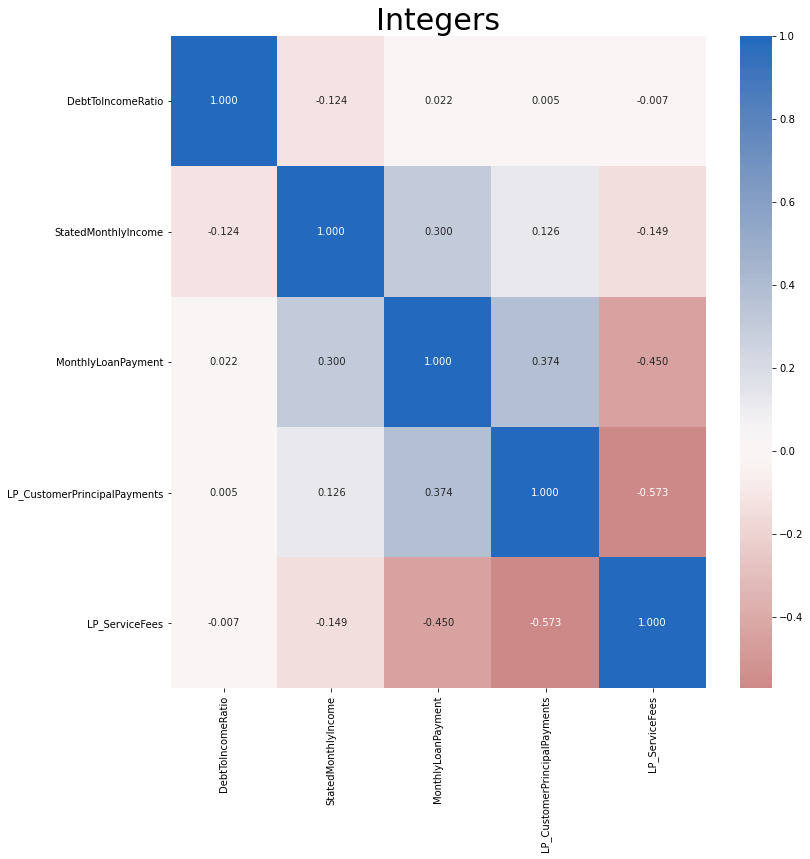

In [44]:
# Are there anyb relations between the integers data?
plt.figure(figsize = [12, 12])
plt.title("Integers", size=30)
sb.heatmap(Loan_clean[df].corr(), annot = True, fmt = '.3f', cmap = 'vlag_r', center = 0);

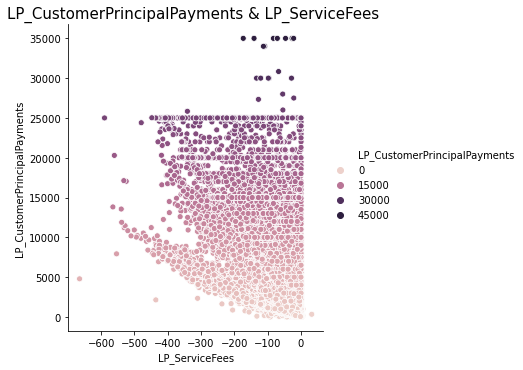

In [45]:
# How the LP_ServiceFees & LP_CustomerPrincipalPayments are related together?
sb.relplot(
    data=Loan_clean,
    x="LP_ServiceFees", y="LP_CustomerPrincipalPayments", hue='LP_CustomerPrincipalPayments')
plt.title("LP_CustomerPrincipalPayments & LP_ServiceFees ", size=15);


#### Insight
> I found a 57% negative relation between 'LP_CustomerPrincipalPayments' & 'LP_ServiceFees', it is negative because the fees are in negative numbers. The insigt is only that it looks people spend more through the least expensive services.

# Objects

In [46]:
list(Loan_clean.select_dtypes(['object']).columns)

['ListingCreationDate',
 'ClosedDate',
 'ProsperRating (numeric)',
 'ProsperRating (Alpha)',
 'ProsperScore',
 'BorrowerState',
 'Occupation',
 'EmploymentStatus',
 'IncomeRange',
 'LoanOriginationDate',
 'LoanOriginationQuarter',
 'MemberKey']

In [47]:
Loan_clean.EmploymentStatus.value_counts()

Employed         65896
Full-time        24118
Not available     2897
Other             2194
Self-employed      993
Part-time          884
Retired            702
Not employed        68
Name: EmploymentStatus, dtype: int64

In [48]:
Loan_clean.Occupation.value_counts()

Other                          24178
Professional                   12427
Computer Programmer             4021
Executive                       3897
Teacher                         3515
                               ...  
Student - College Sophomore       47
Student - College Freshman        31
Judge                             22
Student - Community College       19
Student - Technical School        10
Name: Occupation, Length: 67, dtype: int64

In [49]:
Loan_clean.IncomeRange.value_counts()

$50,000-74,999    28614
$25,000-49,999    28609
$100,000+         15870
$75,000-99,999    15739
$1-24,999          5866
Not displayed      2998
Not employed         56
Name: IncomeRange, dtype: int64

In [50]:
Loan_clean.groupby('IncomeRange').filter(lambda x : len(x)>3)


,ListingNumber,ListingCreationDate,ClosedDate,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,...,LoanCurrentDaysDelinquent,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPrincipalPayments,LP_ServiceFees
0,193129,2007-08-26 19:09:29.263000000,2009-08-14 00:00:00,Closed,Closed,Closed,0,CO,Other,Self-employed,...,0,78,19141,9425,2007-09-12 00:00:00,Q3 2007,1F3E3376408759268057EDA,330.43,9425.00,-133.18
1,1209647,2014-02-27 08:28:07.900000000,Un Closed,6,A,7,2,CO,Professional,Employed,...,0,0,134815,10000,2014-03-03 00:00:00,Q1 2014,1D13370546739025387B2F4,318.93,0.00,0.00
2,81716,2007-01-05 15:00:47.090000000,2009-12-17 00:00:00,Closed,Closed,Closed,0,GA,Other,Not available,...,0,86,6466,3001,2007-01-17 00:00:00,Q1 2007,5F7033715035555618FA612,123.32,3001.00,-24.20
3,658116,2012-10-22 11:02:35.010000000,Un Closed,6,A,9,16,GA,Skilled Labor,Employed,...,0,16,77296,10000,2012-11-01 00:00:00,Q4 2012,9ADE356069835475068C6D2,321.45,4091.09,-108.01
4,909464,2013-09-14 18:38:39.097000000,Un Closed,3,D,4,2,MN,Executive,Employed,...,0,6,102670,15000,2013-09-20 00:00:00,Q3 2013,36CE356043264555721F06C,563.97,1563.22,-60.27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113932,753087,2013-04-14 05:55:02.663000000,Un Closed,4,C,5,1,IL,Food Service Management,Employed,...,0,11,88485,10000,2013-04-22 00:00:00,Q2 2013,2EC435768441332602FDC15,364.74,2238.38,-75.58
113933,537216,2011-11-03 20:42:55.333000000,Un Closed,6,A,8,7,PA,Professional,Employed,...,0,28,55801,2000,2011-11-07 00:00:00,Q4 2011,55C4336679182766893E4FC,65.57,1997.16,-30.05
113934,1069178,2013-12-13 05:49:12.703000000,Un Closed,3,D,3,1,TX,Other,Employed,...,0,3,123122,10000,2013-12-23 00:00:00,Q4 2013,0FE0370029359765342FDB5,273.35,183.15,-16.91
113935,539056,2011-11-14 13:18:26.597000000,2013-08-13 00:00:00,4,C,5,2,GA,Food Service,Full-time,...,0,28,56401,15000,2011-11-21 00:00:00,Q4 2011,A33834861822272782621C8,449.55,15000.00,-235.05


In [51]:
sub_Loan = Loan_clean[Loan_clean.groupby('IncomeRange').IncomeRange.transform('count')>10000].copy()


In [52]:
sub_Loan

,ListingNumber,ListingCreationDate,ClosedDate,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,...,LoanCurrentDaysDelinquent,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPrincipalPayments,LP_ServiceFees
0,193129,2007-08-26 19:09:29.263000000,2009-08-14 00:00:00,Closed,Closed,Closed,0,CO,Other,Self-employed,...,0,78,19141,9425,2007-09-12 00:00:00,Q3 2007,1F3E3376408759268057EDA,330.43,9425.00,-133.18
1,1209647,2014-02-27 08:28:07.900000000,Un Closed,6,A,7,2,CO,Professional,Employed,...,0,0,134815,10000,2014-03-03 00:00:00,Q1 2014,1D13370546739025387B2F4,318.93,0.00,0.00
3,658116,2012-10-22 11:02:35.010000000,Un Closed,6,A,9,16,GA,Skilled Labor,Employed,...,0,16,77296,10000,2012-11-01 00:00:00,Q4 2012,9ADE356069835475068C6D2,321.45,4091.09,-108.01
4,909464,2013-09-14 18:38:39.097000000,Un Closed,3,D,4,2,MN,Executive,Employed,...,0,6,102670,15000,2013-09-20 00:00:00,Q3 2013,36CE356043264555721F06C,563.97,1563.22,-60.27
5,1074836,2013-12-14 08:26:37.093000000,Un Closed,5,B,10,1,NM,Professional,Employed,...,0,3,123257,15000,2013-12-24 00:00:00,Q4 2013,874A3701157341738DE458F,342.37,351.89,-25.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113932,753087,2013-04-14 05:55:02.663000000,Un Closed,4,C,5,1,IL,Food Service Management,Employed,...,0,11,88485,10000,2013-04-22 00:00:00,Q2 2013,2EC435768441332602FDC15,364.74,2238.38,-75.58
113933,537216,2011-11-03 20:42:55.333000000,Un Closed,6,A,8,7,PA,Professional,Employed,...,0,28,55801,2000,2011-11-07 00:00:00,Q4 2011,55C4336679182766893E4FC,65.57,1997.16,-30.05
113934,1069178,2013-12-13 05:49:12.703000000,Un Closed,3,D,3,1,TX,Other,Employed,...,0,3,123122,10000,2013-12-23 00:00:00,Q4 2013,0FE0370029359765342FDB5,273.35,183.15,-16.91
113935,539056,2011-11-14 13:18:26.597000000,2013-08-13 00:00:00,4,C,5,2,GA,Food Service,Full-time,...,0,28,56401,15000,2011-11-21 00:00:00,Q4 2011,A33834861822272782621C8,449.55,15000.00,-235.05


In [53]:
sub_Loan1 = Loan_clean[Loan_clean.groupby('EmploymentStatus').EmploymentStatus.transform('count')>10000].copy()

In [54]:
sub_Loan1

,ListingNumber,ListingCreationDate,ClosedDate,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,...,LoanCurrentDaysDelinquent,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPrincipalPayments,LP_ServiceFees
1,1209647,2014-02-27 08:28:07.900000000,Un Closed,6,A,7,2,CO,Professional,Employed,...,0,0,134815,10000,2014-03-03 00:00:00,Q1 2014,1D13370546739025387B2F4,318.93,0.00,0.00
3,658116,2012-10-22 11:02:35.010000000,Un Closed,6,A,9,16,GA,Skilled Labor,Employed,...,0,16,77296,10000,2012-11-01 00:00:00,Q4 2012,9ADE356069835475068C6D2,321.45,4091.09,-108.01
4,909464,2013-09-14 18:38:39.097000000,Un Closed,3,D,4,2,MN,Executive,Employed,...,0,6,102670,15000,2013-09-20 00:00:00,Q3 2013,36CE356043264555721F06C,563.97,1563.22,-60.27
5,1074836,2013-12-14 08:26:37.093000000,Un Closed,5,B,10,1,NM,Professional,Employed,...,0,3,123257,15000,2013-12-24 00:00:00,Q4 2013,874A3701157341738DE458F,342.37,351.89,-25.33
6,750899,2013-04-12 09:52:56.147000000,Un Closed,2,E,2,1,KS,Sales - Retail,Employed,...,0,11,88353,3000,2013-04-18 00:00:00,Q2 2013,AA4535764146102879D5959,122.67,604.25,-22.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113932,753087,2013-04-14 05:55:02.663000000,Un Closed,4,C,5,1,IL,Food Service Management,Employed,...,0,11,88485,10000,2013-04-22 00:00:00,Q2 2013,2EC435768441332602FDC15,364.74,2238.38,-75.58
113933,537216,2011-11-03 20:42:55.333000000,Un Closed,6,A,8,7,PA,Professional,Employed,...,0,28,55801,2000,2011-11-07 00:00:00,Q4 2011,55C4336679182766893E4FC,65.57,1997.16,-30.05
113934,1069178,2013-12-13 05:49:12.703000000,Un Closed,3,D,3,1,TX,Other,Employed,...,0,3,123122,10000,2013-12-23 00:00:00,Q4 2013,0FE0370029359765342FDB5,273.35,183.15,-16.91
113935,539056,2011-11-14 13:18:26.597000000,2013-08-13 00:00:00,4,C,5,2,GA,Food Service,Full-time,...,0,28,56401,15000,2011-11-21 00:00:00,Q4 2011,A33834861822272782621C8,449.55,15000.00,-235.05


In [55]:
Loan_clean.Occupation.value_counts()

Other                          24178
Professional                   12427
Computer Programmer             4021
Executive                       3897
Teacher                         3515
                               ...  
Student - College Sophomore       47
Student - College Freshman        31
Judge                             22
Student - Community College       19
Student - Technical School        10
Name: Occupation, Length: 67, dtype: int64

In [56]:
sub_Loan2 = Loan_clean[Loan_clean.groupby('Occupation').Occupation.transform('count')>3000].copy()

In [57]:
sub_Loan2

,ListingNumber,ListingCreationDate,ClosedDate,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,...,LoanCurrentDaysDelinquent,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPrincipalPayments,LP_ServiceFees
0,193129,2007-08-26 19:09:29.263000000,2009-08-14 00:00:00,Closed,Closed,Closed,0,CO,Other,Self-employed,...,0,78,19141,9425,2007-09-12 00:00:00,Q3 2007,1F3E3376408759268057EDA,330.43,9425.00,-133.18
1,1209647,2014-02-27 08:28:07.900000000,Un Closed,6,A,7,2,CO,Professional,Employed,...,0,0,134815,10000,2014-03-03 00:00:00,Q1 2014,1D13370546739025387B2F4,318.93,0.00,0.00
2,81716,2007-01-05 15:00:47.090000000,2009-12-17 00:00:00,Closed,Closed,Closed,0,GA,Other,Not available,...,0,86,6466,3001,2007-01-17 00:00:00,Q1 2007,5F7033715035555618FA612,123.32,3001.00,-24.20
4,909464,2013-09-14 18:38:39.097000000,Un Closed,3,D,4,2,MN,Executive,Employed,...,0,6,102670,15000,2013-09-20 00:00:00,Q3 2013,36CE356043264555721F06C,563.97,1563.22,-60.27
5,1074836,2013-12-14 08:26:37.093000000,Un Closed,5,B,10,1,NM,Professional,Employed,...,0,3,123257,15000,2013-12-24 00:00:00,Q4 2013,874A3701157341738DE458F,342.37,351.89,-25.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113928,510097,2011-06-06 19:02:44.443000000,2011-09-19 00:00:00,4,C,6,3,CO,Other,Full-time,...,0,33,50237,2000,2011-06-10 00:00:00,Q2 2011,3A2F3380477699707C81385,73.30,2000.00,-4.41
113930,831523,2013-07-08 10:24:49.700000000,Un Closed,5,B,6,1,IN,Professional,Employed,...,0,8,95132,3000,2013-07-10 00:00:00,Q3 2013,89A735620041442181964DB,106.05,471.89,-16.51
113931,1141292,2014-01-16 20:13:08.040000000,Un Closed,5,B,6,3,IL,Analyst,Employed,...,0,2,128416,25000,2014-01-22 00:00:00,Q1 2014,FC303703545561711E2CDC9,565.50,294.99,-21.23
113933,537216,2011-11-03 20:42:55.333000000,Un Closed,6,A,8,7,PA,Professional,Employed,...,0,28,55801,2000,2011-11-07 00:00:00,Q4 2011,55C4336679182766893E4FC,65.57,1997.16,-30.05


In [58]:
Loan_clean.BorrowerState.value_counts()

CA    13213
TX     6114
NY     5998
FL     5918
IL     5448
GA     4500
OH     3854
MI     3232
VA     2994
NJ     2813
NC     2769
WA     2717
PA     2678
MD     2616
MO     2345
MN     2111
MA     2069
CO     1979
IN     1913
AZ     1720
WI     1657
OR     1586
TN     1576
AL     1541
CT     1490
SC      983
NV      972
KS      964
KY      896
OK      887
LA      866
AR      768
UT      768
MS      707
NE      607
ID      528
NH      509
NM      424
RI      399
DC      360
HI      360
WV      346
MT      293
DE      283
VT      187
AK      183
IA      177
SD      165
WY      133
ME       89
ND       47
Name: BorrowerState, dtype: int64

In [59]:
Customers_class = sub_Loan2 + sub_Loan1

In [60]:
sub_Loan3 = Loan_clean[Loan_clean.groupby('BorrowerState').BorrowerState.transform('count')>3000].copy()

In [61]:
sub_Loan3

,ListingNumber,ListingCreationDate,ClosedDate,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,...,LoanCurrentDaysDelinquent,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPrincipalPayments,LP_ServiceFees
2,81716,2007-01-05 15:00:47.090000000,2009-12-17 00:00:00,Closed,Closed,Closed,0,GA,Other,Not available,...,0,86,6466,3001,2007-01-17 00:00:00,Q1 2007,5F7033715035555618FA612,123.32,3001.00,-24.20
3,658116,2012-10-22 11:02:35.010000000,Un Closed,6,A,9,16,GA,Skilled Labor,Employed,...,0,16,77296,10000,2012-11-01 00:00:00,Q4 2012,9ADE356069835475068C6D2,321.45,4091.09,-108.01
7,768193,2013-05-05 06:49:27.493000000,Un Closed,4,C,4,2,CA,Laborer,Employed,...,0,10,90051,10000,2013-05-13 00:00:00,Q2 2013,737F347089545035681C074,372.60,1955.89,-69.21
8,1023355,2013-12-02 10:43:39.117000000,Un Closed,7,AA,9,7,IL,Food Service,Employed,...,0,3,121268,10000,2013-12-12 00:00:00,Q4 2013,49A53699682291323D04D66,305.54,505.58,-16.77
9,1023355,2013-12-02 10:43:39.117000000,Un Closed,7,AA,11,7,IL,Food Service,Employed,...,0,3,121268,10000,2013-12-12 00:00:00,Q4 2013,49A53699682291323D04D66,305.54,505.58,-16.77
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113931,1141292,2014-01-16 20:13:08.040000000,Un Closed,5,B,6,3,IL,Analyst,Employed,...,0,2,128416,25000,2014-01-22 00:00:00,Q1 2014,FC303703545561711E2CDC9,565.50,294.99,-21.23
113932,753087,2013-04-14 05:55:02.663000000,Un Closed,4,C,5,1,IL,Food Service Management,Employed,...,0,11,88485,10000,2013-04-22 00:00:00,Q2 2013,2EC435768441332602FDC15,364.74,2238.38,-75.58
113934,1069178,2013-12-13 05:49:12.703000000,Un Closed,3,D,3,1,TX,Other,Employed,...,0,3,123122,10000,2013-12-23 00:00:00,Q4 2013,0FE0370029359765342FDB5,273.35,183.15,-16.91
113935,539056,2011-11-14 13:18:26.597000000,2013-08-13 00:00:00,4,C,5,2,GA,Food Service,Full-time,...,0,28,56401,15000,2011-11-21 00:00:00,Q4 2011,A33834861822272782621C8,449.55,15000.00,-235.05


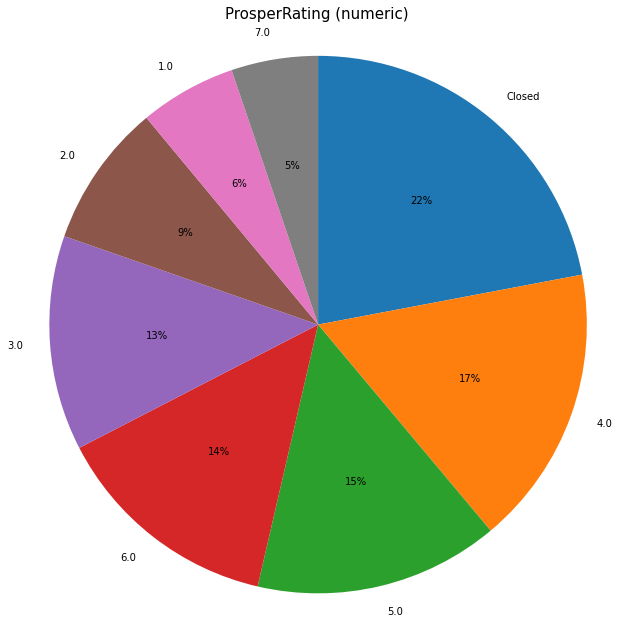

In [62]:
# How are the ProsperRating (numeric) values arragnged and what effect do they play through out the data?
plt.figure(figsize = (11,11))
Bie1 = Loan_clean['ProsperRating (numeric)'].value_counts()
plt.pie(Bie1, labels = Bie1.index, startangle = 90,autopct='%1.0f%%', counterclock = False);
plt.axis('square')
plt.title("ProsperRating (numeric) ", size=15);
Bie1.index;

#### Insight

> The first pies chart is on 'ProsperRating (numeric)', I estmated that it is out of 10, and through the ratings it looks that the customers aren't happy, and to find the issue I think the company needs to conduct a market research.

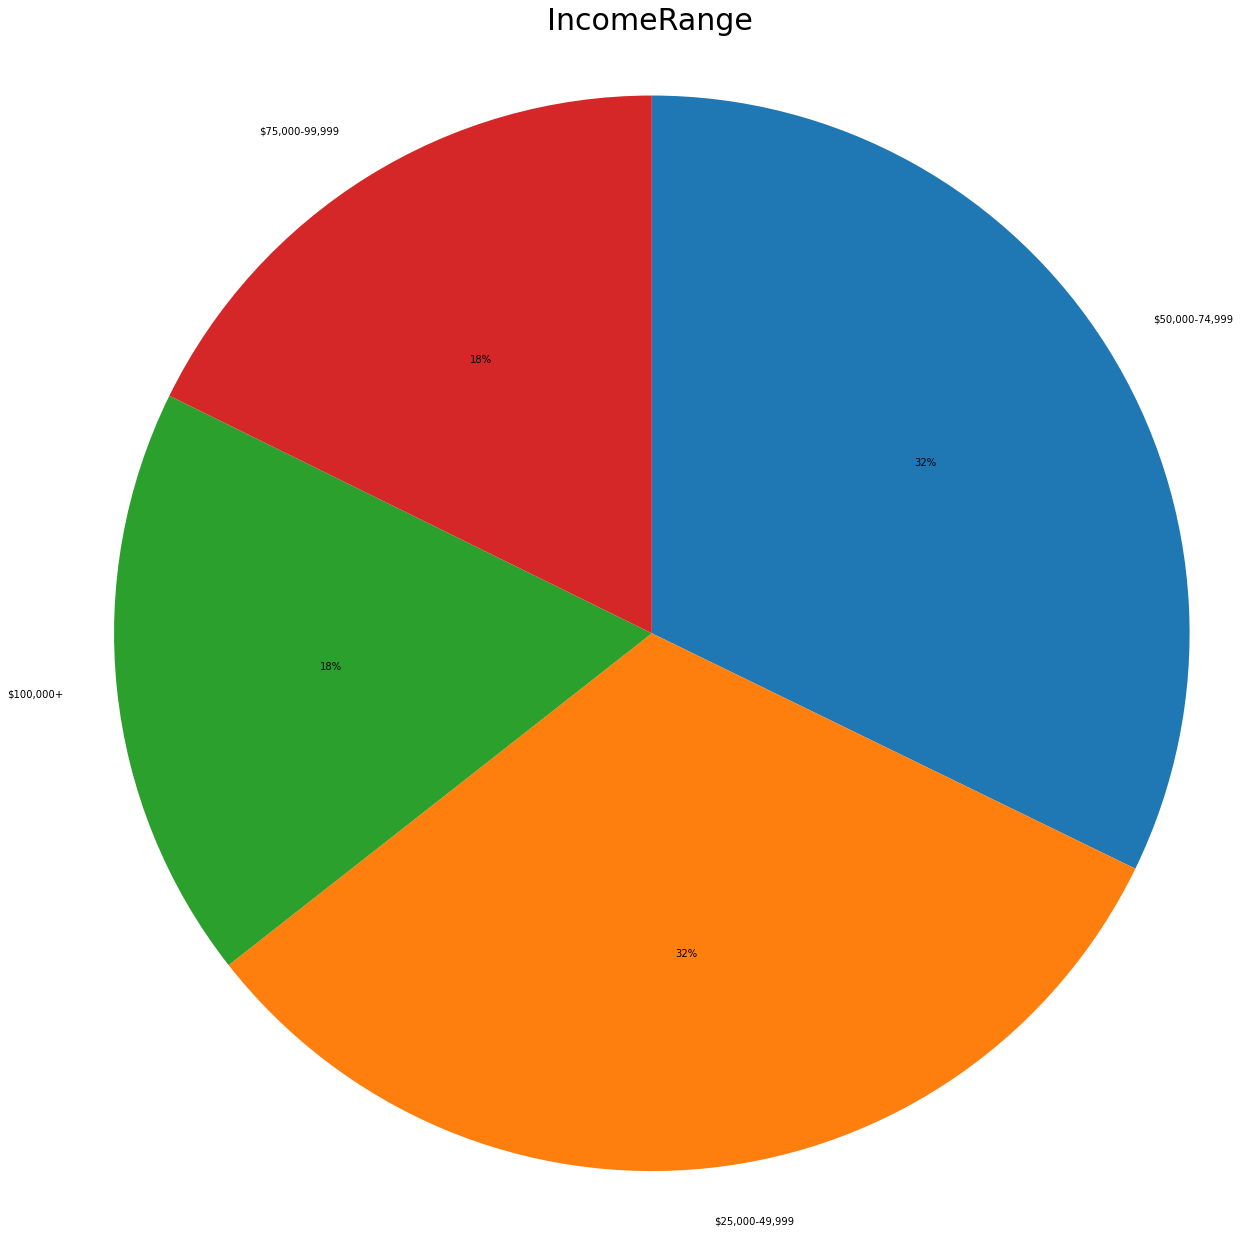

In [63]:
# How are the IncomeRange values arragnged and what effect do they play through out the data?
plt.figure(figsize = (22,22))
Bie2 = sub_Loan['IncomeRange'].value_counts()
plt.pie(Bie2, labels = Bie2.index, startangle = 90, autopct='%1.0f%%', counterclock = False)
plt.title("IncomeRange", size=30);
plt.axis('square');


#### Insight

> The secound pie 'IncomeRange', and it looks that most of the customers has a high income, and it is their target customers they should focus, for the very high income customers have a less percantage, and thats due to many reasons, but I have two assumptions to that, one that when they want something they buy it, second is that is normal to have few very rich people it is impossible to have many very rich people in a country like more than 25% of the country.

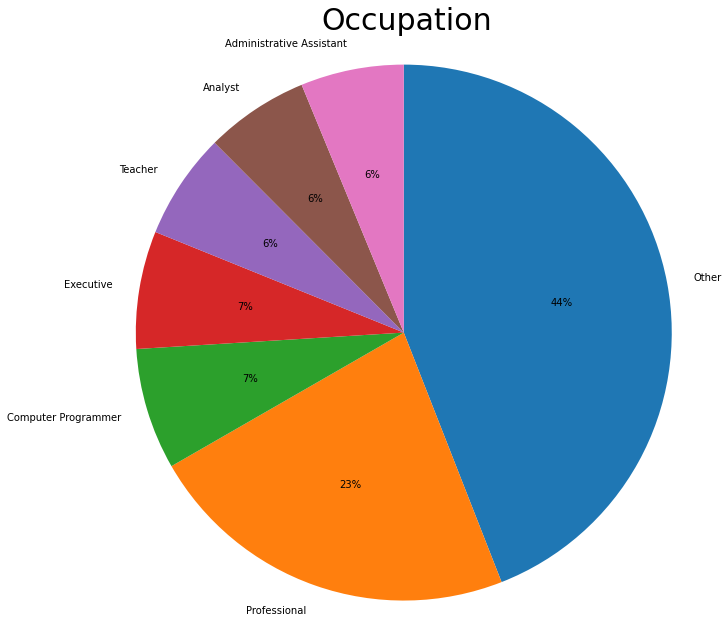

In [64]:
# How are the Occupation values arragnged and what effect do they play through out the data?
plt.figure(figsize = (11,11))
Bie3 = sub_Loan2['Occupation'].value_counts()
plt.pie(Bie3, labels = Bie3.index, startangle = 90,autopct='%1.0f%%', counterclock = False)
plt.title("Occupation", size=30);
plt.axis('square');

#### Insight

> The third pie chart was on 'Occupation' and to see if the role has impact, and offcourse it has impact but 44% percent of the top employments are unone, and that is due to the very specific roles they have, like doctors, marketing, enegeneering, have many majors and job titles with different names. But we can see that profistonals are more customers than excutives, and I think it could be important to find if there is a big realtion.

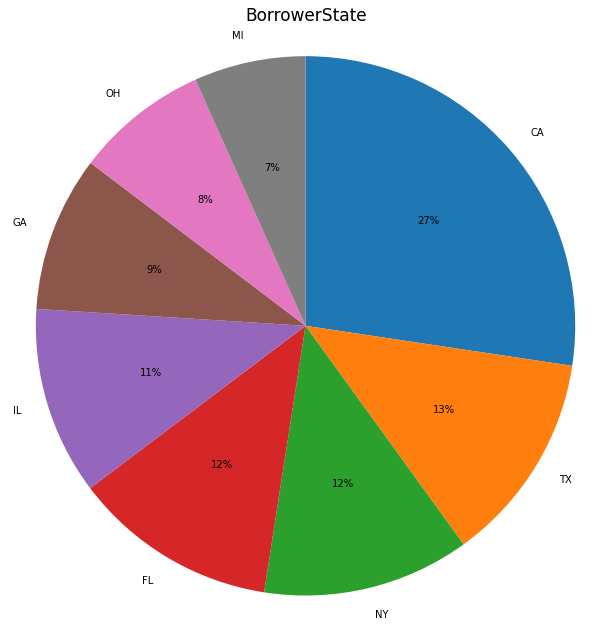

In [65]:
# How are the BorrowerState values arragnged and what effect do they play through out the data?
plt.figure(figsize = (11,11))
Bie3 = sub_Loan3['BorrowerState'].value_counts()
plt.pie(Bie3, labels = Bie3.index, startangle = 90,autopct='%1.0f%%', counterclock = False)
plt.title("BorrowerState", size=17);
plt.axis('square');

#### Insight

> The fourth pie chart was on 'BorrowerState', and CA has a big percentage over the top states, and that is clear why, because CA has many of rich people, it is expensive, and has many torrists so it proves that this loan is for rich people. 

#  All Insights 

> I found a 57% negative relation between 'LP_CustomerPrincipalPayments' & 'LP_ServiceFees', it is negative because the fees are in negative numbers. The insigt is only that it looks people spend more through the least expensive services.

> The first pies chart is on 'ProsperRating (numeric)', I estmated that it is out of 10, and through the ratings it looks that the customers aren't happy, and to find the issue I think the company needs to conduct a market research.

> The secound pie 'IncomeRange', and it looks that most of the customers has a high income, and it is their target customers they should focus, for the very high income customers have a less percantage, and thats due to many reasons, but I have two assumptions to that, one that when they want something they buy it, second is that is normal to have few very rich people it is impossible to have many very rich people in a country like more than 25% of the country.

> The third pie chart was on 'Occupation' and to see if the role has impact, and offcourse it has impact but 44% percent of the top employments are unone, and that is due to the very specific roles they have, like doctors, marketing, enegeneering, have many majors and job titles with different names. But we can see that profistonals are more customers than excutives, and I think it could be important to find if there is a big realtion.

> The fourth pie chart was on 'BorrowerState', and CA has a big percentage over the top states, and that is clear why, because CA has many of rich people, it is expensive, and has many torrists so it proves that this loan is for rich people. 

###  Relationships Observed 

> There is a a positive relationship between the income and the people who takes the loan, and it is clear it segment rich people. 
> There is relation between the service cost and income, the higher the income the people would like to buy the cheap peroducts and they maybe essential products and thats why they buy it, not only because it is cheap.
> CA is a state for rich people so it proves that the loan is for rich people.
###  Observe Interesting Relationships (not the main feature(s) of interest)?

> I observed that the Professionals tend to loan more than the other jobs even more than executives, and it is really interesting to know why through observation.

## Multivariate Exploration



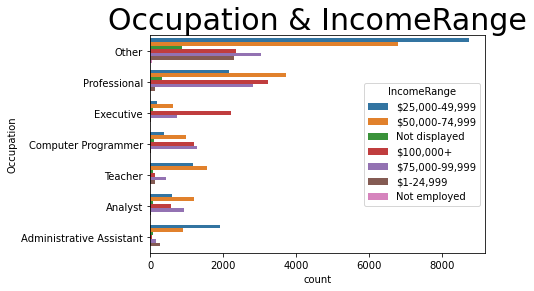

In [66]:
# The relation between IncomeRange, and Occupation
sb.countplot(y ='Occupation',hue = 'IncomeRange', data = sub_Loan2)
plt.title("Occupation & IncomeRange", size=30);

#### Insight

> Administrative Assitants has the highst income, while most customers are professionals so the company should focus on them

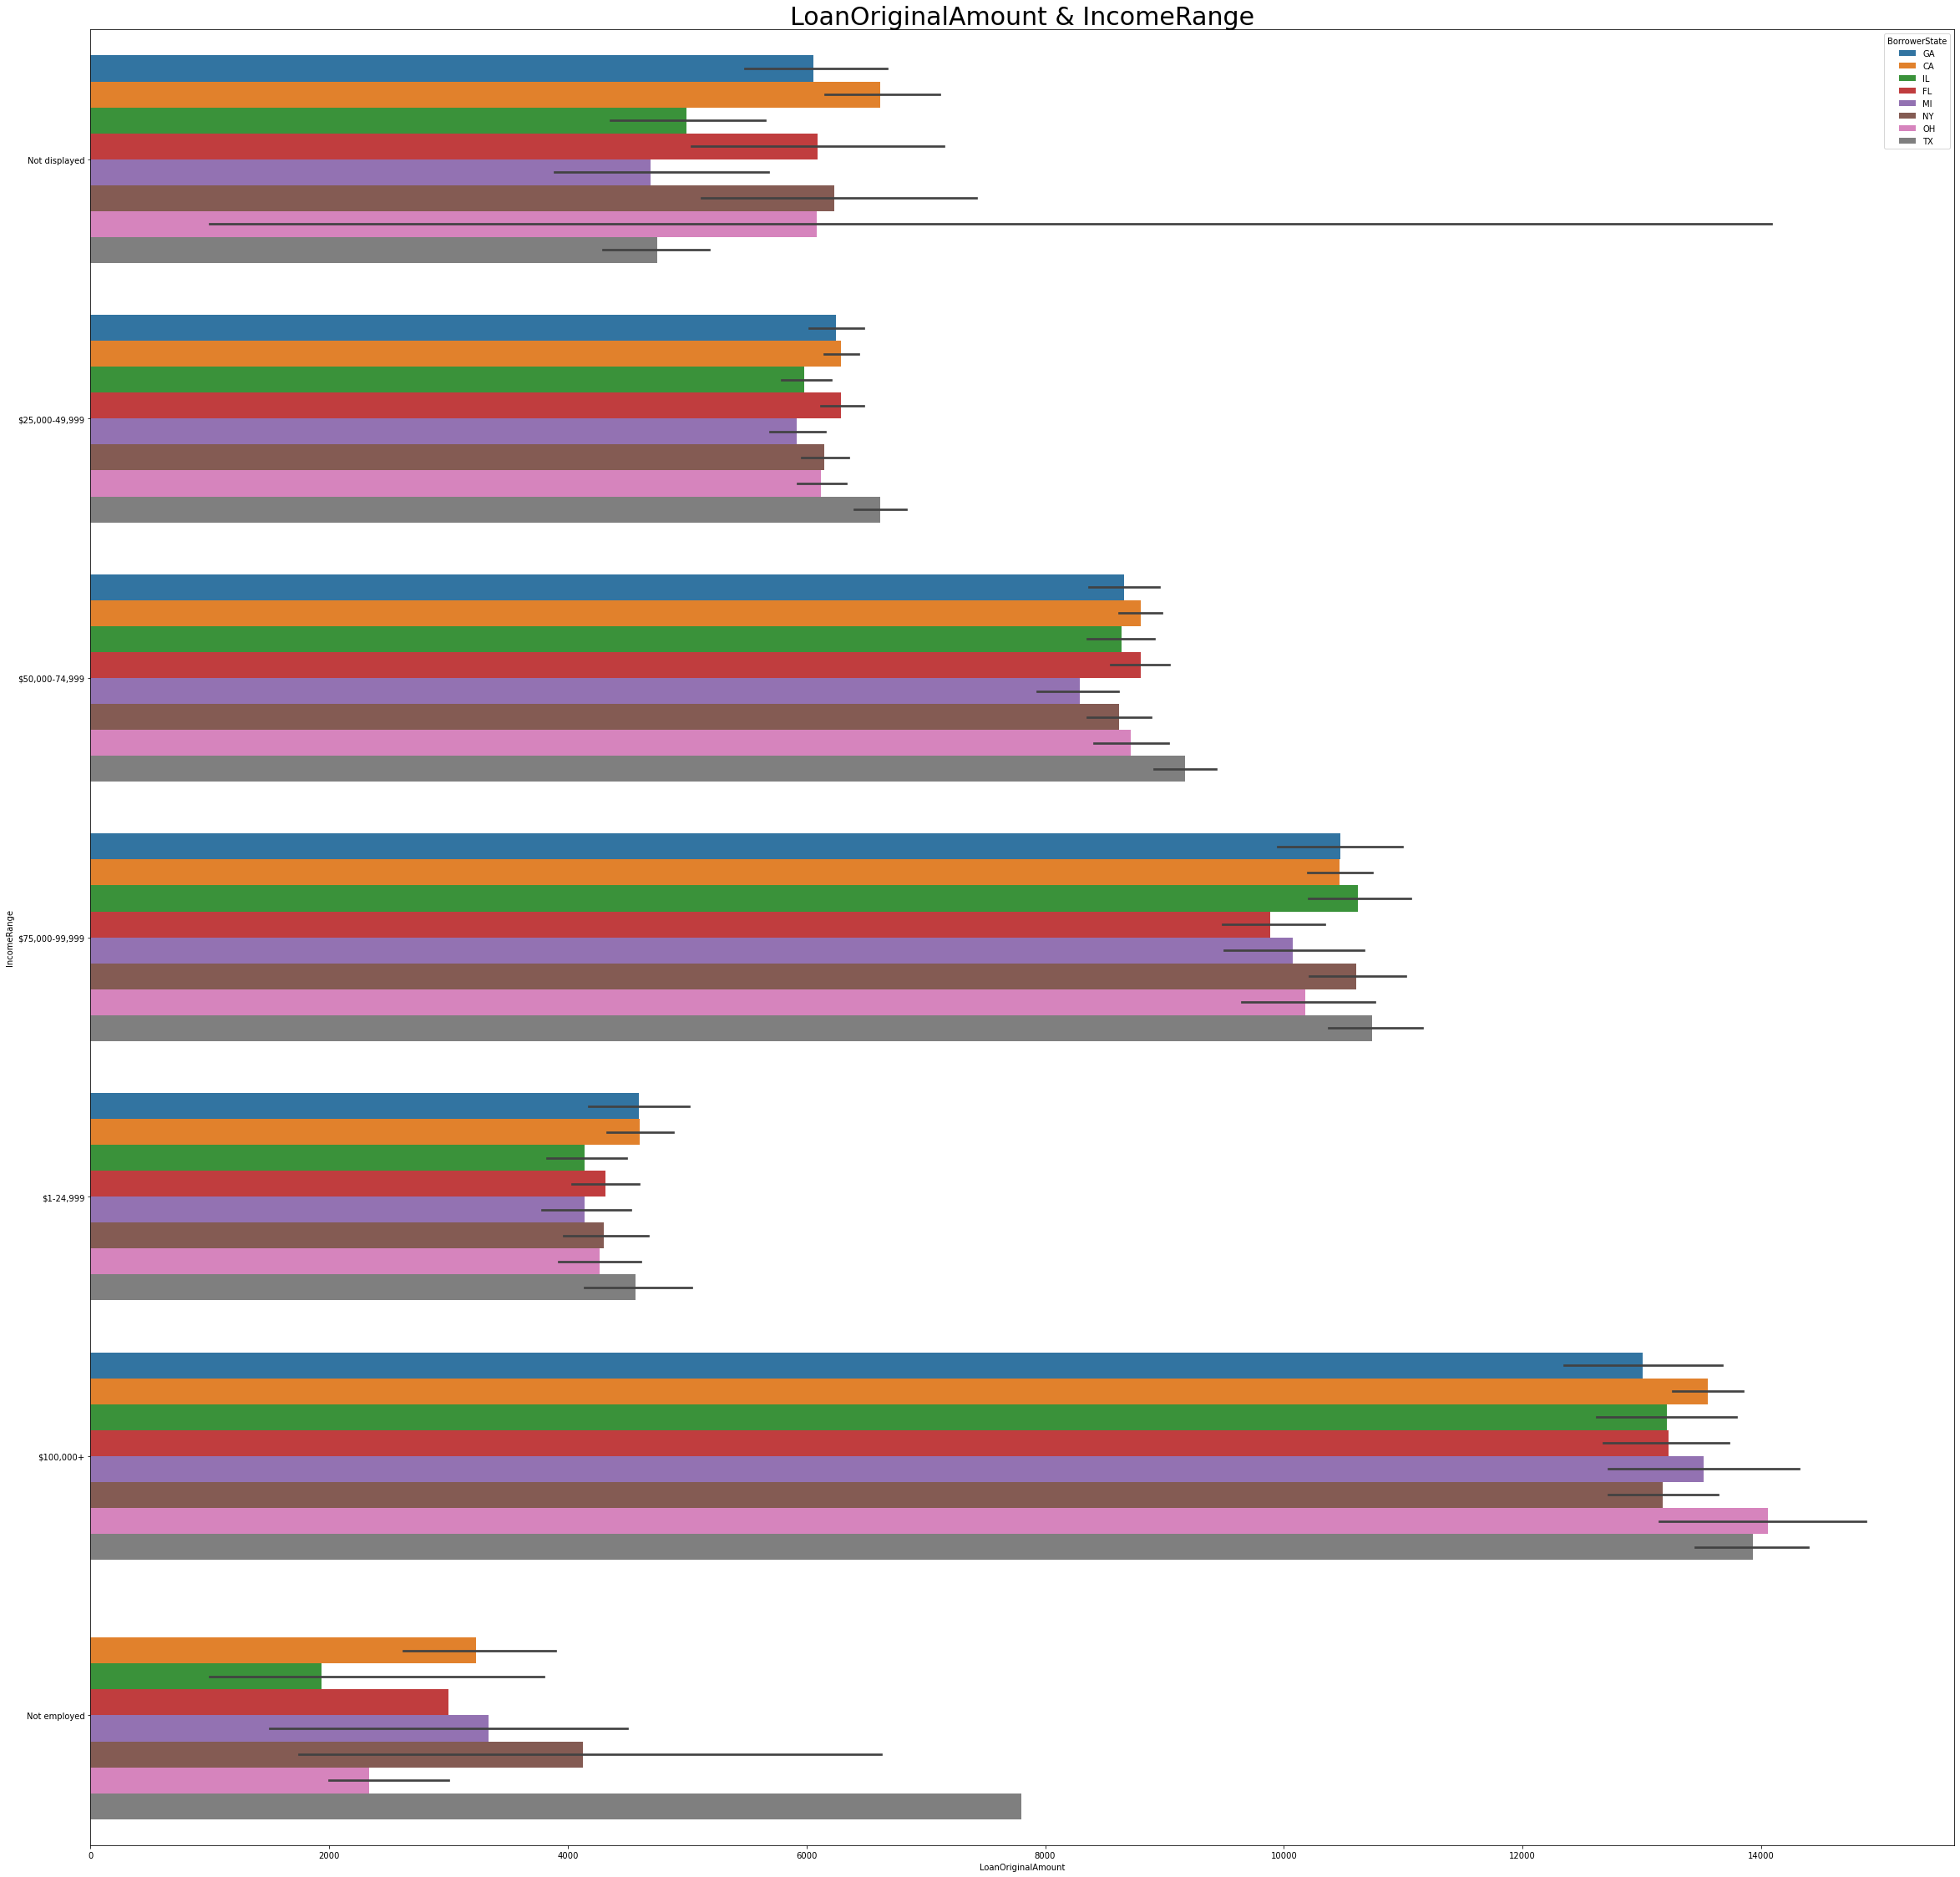

In [67]:
# Are there an relation between LoanOriginalAmount, IncomeRange, and BorrowerState?
plt.figure(figsize = (40,40))
sb.barplot(data=sub_Loan3, x="LoanOriginalAmount", y="IncomeRange", hue = 'BorrowerState')
plt.title("LoanOriginalAmount & IncomeRange", size=30);

#### Insight

> The higher the income the higher the spending, also the income and spending through out the states is random, so there is no clue that states that the richest people or the highest spending is in CA.
> CA was not one of the highest spending states either the highest income indiviuals, so it proves that my previous insight about it was wrong.

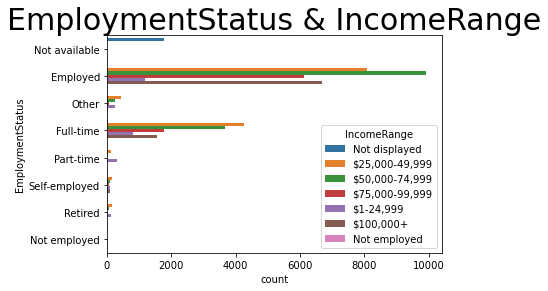

In [68]:
# The relation between EmploymentStatus, and BorrowerStat?
sb.countplot(y ='EmploymentStatus',hue = 'IncomeRange', data = sub_Loan3)
plt.title("EmploymentStatus & IncomeRange", size=30);

#### Insight
> Most of the customers have income between 50,000 nto 74,999 dollars, and they are Employed, so we should be serving
these and also the reason could be because they can't buy directly from their income and they are Employed, so it is hard to
work in two entities at the same time.

In [69]:
Loan.to_csv('Loan')
Loan_clean.to_csv('Loan_clean')
sub_Loan.to_csv('sub_Loan')
sub_Loan1.to_csv('sub_Loan1')
sub_Loan2.to_csv('sub_Loan2')
sub_Loan3.to_csv('sub_Loan3')

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> The higher the income the higher the spending, also the income and spending through out the states is random, so there is no clue that states that the richest people or the hiest spending is in CA.
> Adminstrative Assitant has the highest income but don't spend alot. Among the Occupations Exuctives are the most spenders, and among the income the (100,000+) spends the most.
> The state that has very rich people is FL & IL, the highest income is for selfEmployed and the other listed jobs.

### Were there any interesting or surprising interactions between features?

> CA was not one of the highest soending states either the highest income indiviuals, so it proves that my previous insight about it was wrong.

# Resources
- https://stackoverflow.com/questions/24084576/plot-a-stacked-bar-graph-from-two-pandas-groupby-objects
- https://stackoverflow.com/questions/21572870/matplotlib-percent-label-position-in-pie-chart
- https://www.geeksforgeeks.org/limited-rows-selection-with-given-column-in-pandas-python/
- https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html
- https://seaborn.pydata.org/generated/seaborn.scatterplot.html
- https://seaborn.pydata.org/introduction.html
- https://www.dataforeverybody.com/matplotlib-seaborn-pie-charts/
- https://jakevdp.github.io/PythonDataScienceHandbook/04.06-customizing-legends.html
- https://medium.com/@harsz89/how-to-drop-rows-based-on-column-values-using-pandas-dataframe-38cf50e4c95a